# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm

****

In [72]:
import pandas as pd
import pylab
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
import scipy.stats

df = pd.read_csv('data/human_body_temperature.csv')

In [73]:
df.describe()
#count value, easily obtained with len(df), is 130 (which means 130 total observations for this project)

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [74]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

[Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)

#### We'll observe the data through a histogram to see if the data looks like a normal distribution. We will need to set up mu (mean) and std(standard deviation

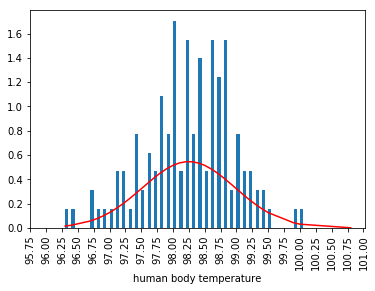

Average (Mu): 98.2492307692 / Standard Deviation: 0.730357778905


In [75]:
observed_temperatures = df['temperature'].sort_values()
bin_val = np.arange(start= observed_temperatures.min(), stop= observed_temperatures.max(), step = .05)
mu, std = np.mean(observed_temperatures), np.std(observed_temperatures)

#p will be the theoretical normal distribution calculated from the mean and standard deviation taken from the temperatures dataset.
p = norm.pdf(observed_temperatures, mu, std)

#plots
_ = plt.hist(observed_temperatures,bins = bin_val, normed=True, stacked=True)
_ = plt.plot(observed_temperatures, p, color = 'red')
_ = plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)
_ = plt.xlabel('Human Body Temperature Distributions')
_ = plt.xlabel('human body temperature')
plt.show()


print('Average (Mu): '+ str(mu) + ' / ' 'Standard Deviation: '+str(std))

#### Looks normally distributed, but let us check and see if it is truly a normal distribution by using normality tests from scipy.stats to see if it falls within a normal distribution.

Shapiro-Wilk Stat: 0.9865769743919373  Shapiro-Wilk p-Value: 0.2331680953502655
Anderson Darling: AndersonResult(statistic=0.52010388267143526, critical_values=array([ 0.56 ,  0.637,  0.765,  0.892,  1.061]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
D'Agostino and Pearson: NormaltestResult(statistic=2.7038014333192359, pvalue=0.25874798634882118)
0.258747986349


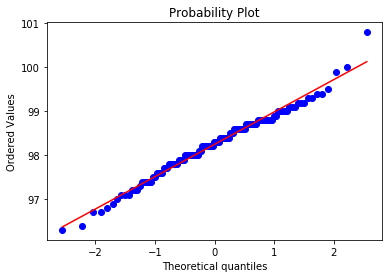

In [76]:
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/

x = observed_temperatures

#Shapiro-Wilk Test:
shapiro_test, shapiro_p = scipy.stats.shapiro(x)
print("Shapiro-Wilk Stat:",shapiro_test, " Shapiro-Wilk p-Value:", shapiro_p)

#Anderson-Darling
anderson_results = scipy.stats.anderson(x)
print("Anderson Darling:", anderson_results)


#D’Agostino and Pearson
dagostino_results = scipy.stats.mstats.normaltest(x)
print("D'Agostino and Pearson:", dagostino_results)


k2, p = scipy.stats.normaltest(observed_temperatures)
print(p)


#Another method to determining normality is through Quantile-Quantile Plots.
scipy.stats.probplot(observed_temperatures, dist="norm", plot=pylab)
pylab.show()



#### From these The p value is much larger than the significance value of .05,  and therefore cannot prove that the  null hypothesis is false. Let's plot an ecdf just to support the Q-Q plot.

Mean temperature:  98.2492307692 with standard deviation of +/- 0.730357778905


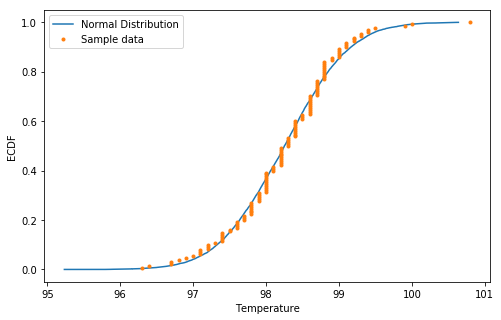

In [126]:
def ecdf(data):
    #Compute ECDF
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Compute empirical mean and standard deviation

# Number of samples
n = len(df['temperature']) 

# Sample mean
mu = np.mean(df['temperature']) 

# Sample standard deviation
std = np.std(df['temperature']) 

print('Mean temperature: ', mu, 'with standard deviation of +/-', std)

#Random sampling of the data based off of the mean of the data.
#
normalized_sample = np.random.normal(mu, std, size=10000)
x_temperature, y_temperature = ecdf(df['temperature'])
normalized_x, normalized_y = ecdf(normalized_sample)

# Plot the ECDFs
fig = plt.figure(figsize=(8, 5))
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Temperature')
_ = plt.legend(('Normal Distribution', 'Sample data'))

## 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

#### According to the Central Limit Theorem (CLT), a sample size of 30 or more is large enough for the central limit theorem to take effect. The closer the population distribution is to a normal distribution, the fewer samples needed to demonstrate the theorem. 

## 3. Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

#### A t-score is usually used when a sample size is smaller (n<30) and has an unknown population standard deviation. Z-scores are used when the sample sizes are larger and we know the standard deviation. In this case, both have their own cons, but in this case a t-score would be best in this instance.

#### We would use a one-sample test as we are only comparing one value in this instance.

#### Our null hypothesis follows Carl Wunderlich's proposition that 98.6 degrees Farenheit was the conventional avereage for human body temperatures.

In [127]:
# Shift the data so the mean is equal to the the conventional mean

#Carl Wunderlich's Mean
CW_mu = 98.6

#Shifted temperatures to match Carl Wunderlich's mean
shifted_temp = df['temperature'] - mu + CW_mu


# Define test statistic function
def t_statistic(data, mu=98.6):
    return (np.mean(data) - CW_mu) / (np.std(data) / np.sqrt(len(data)))


# Compute test statistic for data
t_observed = t_statistic(df['temperature'], CW_mu)


# Define bootstrapping functions
def bootstrap_replicate_1d(data, func):
    #Draw one bootstrap replicate for a 1-d array of data
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    #Draw (size) number of bootstrap replicates.
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates


# Simulate data acquisition under the null hypothesis by bootstrapping the shifted data
bs_t_reps = draw_bs_reps(shifted_temp, t_statistic, size=10000)


# Compute the p-value
p_value = np.sum(bs_t_reps) >=(t_observed) / len(bs_t_reps)


print('t-stat: ', t_observed)
print('p-value for t-stat: {:.2e}'.format(p_value))

t-stat:  -5.47592520208
p-value for t-stat: 0.00e+00


#### The T-Stat -5.476 leads to the p-value = 0. This means that of the 10,000 trial conducted, there was not a single mean that came within the bounds of our observed sample mean. We must reject the null hypothesis and conclude that the true population mean is not Carl Wunderlich's 98.6 and that for 120 years, we have been led to believe the wrong average body temperature.


#### The results are similar to the t-test as the z-test usually operates with a known sigma (standard deviation). In this case we had to calculate our own using np.std over the samples.

## 4. Draw a small sample of size 10 from the data and repeat both tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [80]:
random_sample = observed_temperatures.sample(n=10)
    
shifted_sample = random_sample - np.mean(random_sample) + CW_mu

t_observed = t_statistic(random_sample)
bs_t_reps = draw_bs_reps(random_sample, t_statistic, size=10000)
p_value = np.sum(bs_t_reps) >= ((t_observed)/len(bs_t_reps))
print('t-stat for 10 samples', t_observed)
print('p-value for t-stat: {:.2e}'.format(p_value), '\n')

z_observed = z_statistic(random_sample)
bs_z_reps = draw_bs_reps(random_sample, z_statistic, size=10000)
p_value = np.sum(bs_z_reps) >=(z_observed/len(bs_z_reps))
print('z-stat for 10 samples', z_observed)
print('p-value for z-stat: {:.2e}'.format(p_value))                              
                            

t-stat for 10 samples -1.83154851378
p-value for t-stat: 0.00e+00 

z-stat for 10 samples -1.60201310653
p-value for z-stat: 0.00e+00


#### Since the sample size is larger and since we do not know the standard deviation, a t-stat test is best used for the sampling. The p values are varied between the two tests. Both of the 

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [81]:
mu = df['temperature'].mean()
confidence_interval = np.percentile(df['temperature'], [2.5,97.5])
print('The confidence interval (or acceptable temperature bounds for "normal" temperatures) fall between', confidence_interval)

z_critical = scipy.stats.norm.ppf(q = 0.975)
error_margin = z_critical * (np.std(df['temperature']/math.sqrt(len(df['temperature']))))
print('The margin of error for the mean temperature is', error_margin)

prediction_interval = z_critical * (np.std(df['temperature'])/math.sqrt(1))
print('The prediction interval is ',mu - prediction_interval, 'and ',mu + prediction_interval )

The confidence interval (or acceptable temperature bounds for "normal" temperatures) fall between [ 96.7225  99.4775]
The margin of error for the mean temperature is 0.125548657774
The prediction interval is  96.8177558267 and  99.6807057117


#### The confidence intervals fall between 96.7225 and 99.4775 with a margin of error of 0.12. the 95% prediction interval states that a person's body temperature would be abnormal if it feel outside of the 95% prediction interva of 96.8 to 99.7 degrees farenheit.

## 6. Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

In [105]:
male = df[df['gender']=='M']
female = df[df['gender']=='F']

In [83]:
print("Count of Female Observations",len(df[df.gender=='F']))
print("Count of Male Observations",len(df[df.gender=='M']))


Count of Female Observations 65
Count of Male Observations 65


#### Let's look at the male and female probability density function plots below to see how they are distributed.

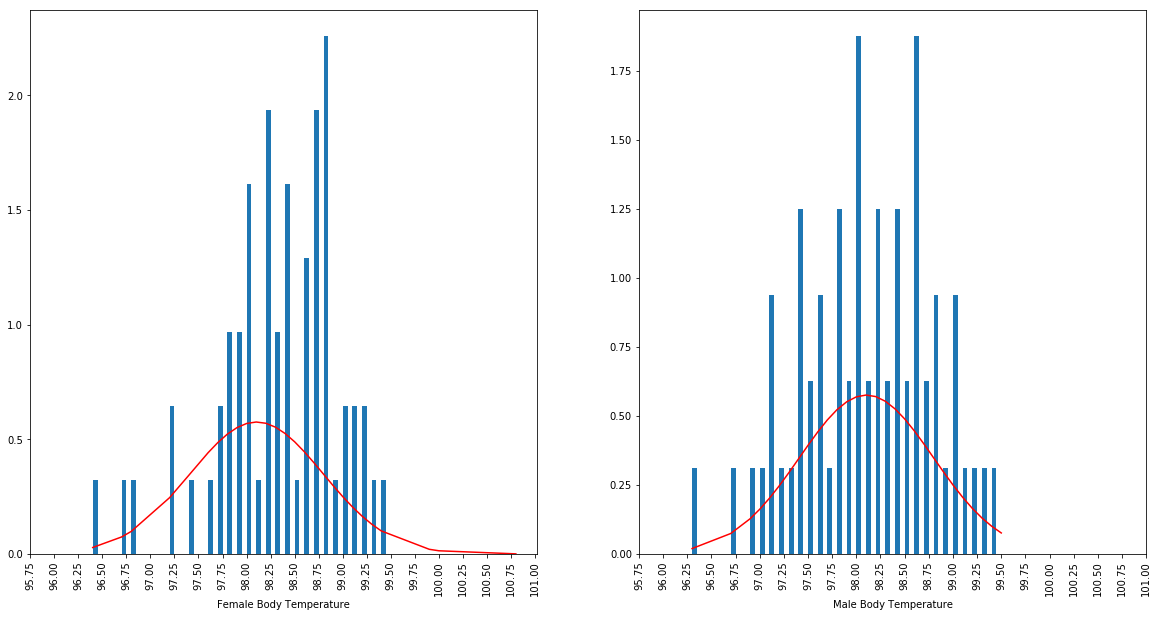

In [85]:
female_temps = female['temperature'].sort_values()
bin_val = np.arange(start= female_temps.min(), stop= female_temps.max(), step = .05)
mu, std = np.mean(female_temps), np.std(female_temps)

male_temps = male['temperature'].sort_values()
bin_val = np.arange(start= male_temps.min(), stop= male_temps.max(), step = .05)
mu, std = np.mean(male_temps), np.std(male_temps)

#p will be the theoretical normal distribution calculated from the mean and standard deviation taken from the temperatures dataset.
f = norm.pdf(female_temps, mu, std)
m = norm.pdf(male_temps, mu, std)
#plots
_ = plt.figure(figsize=(20,10))
_ = plt.subplot(1,2,1)
_ = plt.hist(female_temps,bins = bin_val, normed=True, stacked=True)
_ = plt.plot(female_temps, f, color = 'red')
_ = plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)
_ = plt.xlabel('Female Temperature Distributions')
_ = plt.xlabel('Female Body Temperature')


_ = plt.subplot(1,2,2)
_ = plt.hist(male_temps,bins = bin_val, normed=True, stacked=True)
_ = plt.plot(male_temps, m, color = 'red')
_ = plt.xticks(np.arbange(95.75,101.25,0.25),rotation=90)
_ = plt.xlabel('Male Temperature Distributions')
_ = plt.xlabel('Male Body Temperature')
plt.show()

#### These PDFs appear to look fairly different. Females tend to cluster closer to the mean temperature while also being higher on average, while male temperatures look more loosely distributed and lower than its female counterpart.

In [96]:
def ecdf(data):
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1)/n
    return x, y

female_x, female_y = ecdf(female_temps)
male_x, male_y = ecdf(male_temps)

Average Male Temp: 98.1046153846  Average Female Temp:  98.3938461538


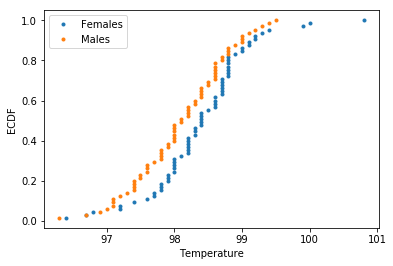

In [99]:
_ = plt.plot(female_x, female_y, marker='.', linestyle='none')
_ = plt.plot(male_x, male_y, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Temperature')
_ = plt.legend(('Females', 'Males'))
print('Average Male Temp:', np.mean(male_temps), ' Average Female Temp: ', np.mean(female_temps))

#### From the EDA visualization, there is a difference in the female and male temperatures with female temperatures skewing higher and males skewing lower. When we calculate average male vs female temparates, we get female temperates at an average of 98.394 and males had an average of 98.104.

#### Next we will performa permutation test since they can simulate the hyppothesis that two variables have identify probability .

In [121]:
male = df[df['gender']=='M']
female = df[df['gender']=='F']

male_temp = np.array(male['temperature'])
female_temp = np.array(female['temperature'])

def diff_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

diff_obs = diff_of_means(female['temperature'], male['temperature'])

perm_replicates = np.empty(10000)
for i in range(len(perm_replicates)):
    both = np.concatenate((female_temp, male_temp))
    both_perm = np.random.permutation(both)
    females_perm = both_perm[:len(female_temp)]
    males_perm = both_perm[len(female_temp):]
    perm_replicates[i] = diff_of_means(females_perm, males_perm)
    
p_value = np.sum(abs(perm_replicates) >= abs(diff_obs)) / len(perm_replicates)

print('Observed Difference: ', diff_obs)
print('p-value: ', p_value)

Observed Difference:  0.289230769231
p-value:  0.0256


#### The p-value is less the the significance value of 0.05. THerefore, we can reject the null hypothesis and stipulate that there is a significant difference between the distribution of male and female temperatures.

#### In conclusion, Car Wunderluch's assessment of the 98.6 degree temperature for the human body was statistically inaccurate. The analysis proves that the mean human body temperature is 98.2 +/- 0.126 (to a 95% confidence interval). We also found a significant difference between male and female average body temperatures which differed by .289 degrees on average with females having the warmer body temps.